In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
from numpy.random import uniform, normal
from sklearn.ensemble import RandomForestClassifier as rf


In [2]:
#Copy of Generate Gaussian Parity from KDG.utils (Just for reference - Skip Cell)
def generate_gaussian_parity(
    n_samples,
    centers=None,
    class_label=None,
    cluster_std=0.25,
    center_box=(-1.0,1.0),
    angle_params=None,
    random_state=None,
):
    """
    Generate 2-dimensional Gaussian XOR distribution.
    (Classic XOR problem but each point is the
    center of a Gaussian blob distribution)
    Parameters
    ----------
    n_samples : int
        Total number of points divided among the four
        clusters with equal probability.
    centers : array of shape [n_centers,2], optional (default=None)
        The coordinates of the ceneter of total n_centers blobs.
    class_label : array of shape [n_centers], optional (default=None)
        class label for each blob.
    cluster_std : float, optional (default=1)
        The standard deviation of the blobs.
    center_box : tuple of float (min, max), default=(-1.0, 1.0)
        The bounding box for each cluster center when centers are generated at random.
    angle_params: float, optional (default=None)
        Number of radians to rotate the distribution by.
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    """

    if random_state != None:
        np.random.seed(random_state)

    if centers == None:
        centers = np.array([(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)])

    if class_label == None:
        class_label = [0, 1, 1, 0]

    blob_num = len(class_label)

    # get the number of samples in each blob with equal probability
    samples_per_blob = np.random.multinomial(
        n_samples, 1 / blob_num * np.ones(blob_num)
    )

    X, y = make_blobs(
        n_samples=samples_per_blob,
        n_features=2,
        centers=centers,
        cluster_std=cluster_std,
        center_box=center_box
    )

    for blob in range(blob_num):
        y[np.where(y == blob)] = class_label[blob]

    if angle_params != None:
        R = _generate_2d_rotation(angle_params)
        X = X @ R

    return X, y.astype(int)

In [3]:
# Skip cell (Reference for how to use above function)
X, y = generate_gaussian_parity(20000, cluster_std=0.5)

In [4]:
    #Define number of samples & standard deviations of all clusters
    n_samples = 2000 #Update to 20000 once working 
    centers=None
    class_label=None
    cluster_std=0.5 #Passed as parameter
    center_box=(-1.0,1.0)
    angle_params=None
    random_state=None

In [5]:
    #Defining class labels & centers of the blobs
    if random_state != None:
        np.random.seed(random_state)

    if centers == None:
        centers = np.array([(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)])

    if class_label == None:
        class_label = [0, 1, 1, 0]

    blob_num = len(class_label)

In [6]:
blob_num

4

In [7]:
    # get the number of samples in each blob with equal probability
    samples_per_blob = np.random.multinomial(
        n_samples, 1 / blob_num * np.ones(blob_num)
    )



In [8]:
samples_per_blob

array([516, 476, 496, 512])

In [9]:
    #Making 4 blobs, each with a given mean & standard deviation
    X, y = make_blobs(
        n_samples=samples_per_blob,
        n_features=2,
        centers=centers,
        cluster_std=cluster_std,
        center_box=center_box
    )

#'y' is assigned a value between 0 & 3 - belongs to one of 4 blobs 
# 'X' is a 2D set of blobs

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
for blob in range(blob_num):
    temp = X[np.where(y==blob)]
    

Blob Number:  0
Centre/Mean: [-0.48656727  0.52639016]
Standard Dev:  [0.4750047  0.50205089]
Blob Number:  1
Centre/Mean: [0.45997657 0.50138206]
Standard Dev:  [0.48847649 0.49870298]
Blob Number:  2
Centre/Mean: [-0.48758295 -0.46654232]
Standard Dev:  [0.50425129 0.49806182]
Blob Number:  3
Centre/Mean: [ 0.47960309 -0.51532822]
Standard Dev:  [0.48057929 0.50729339]


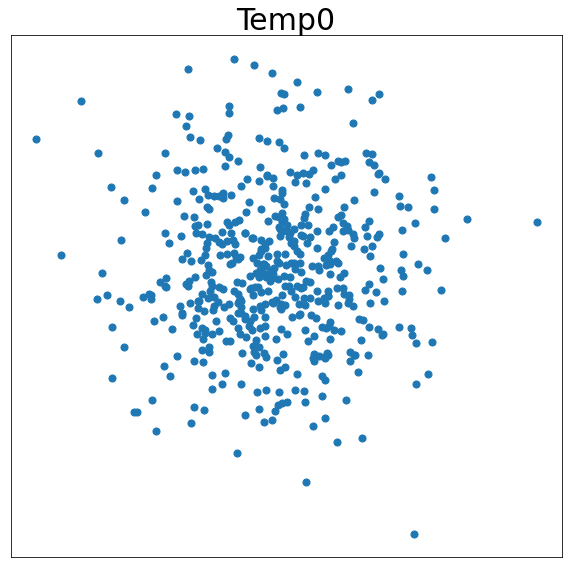

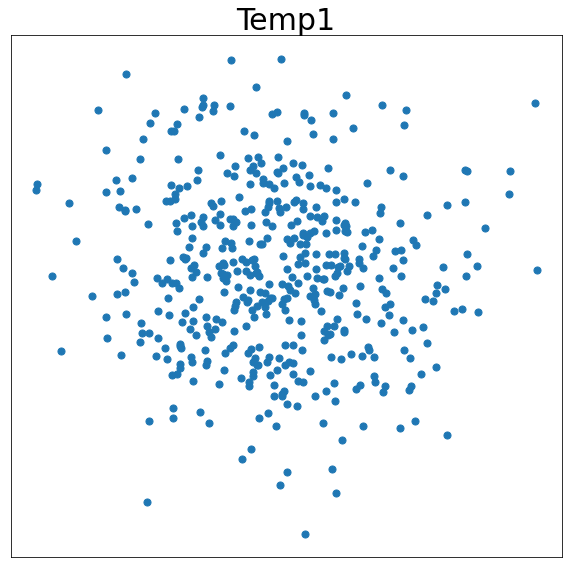

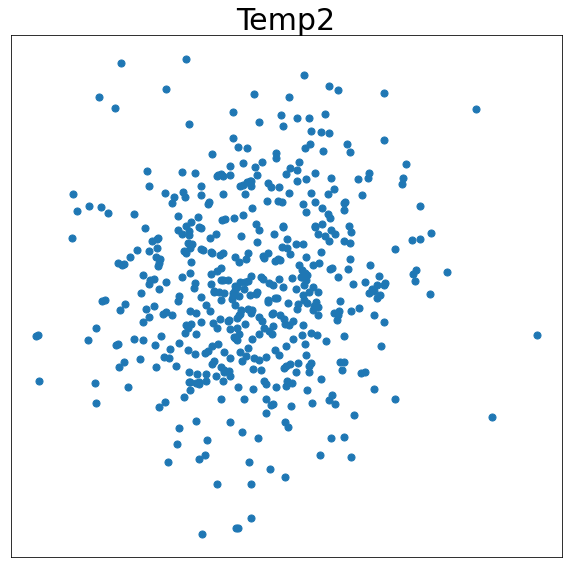

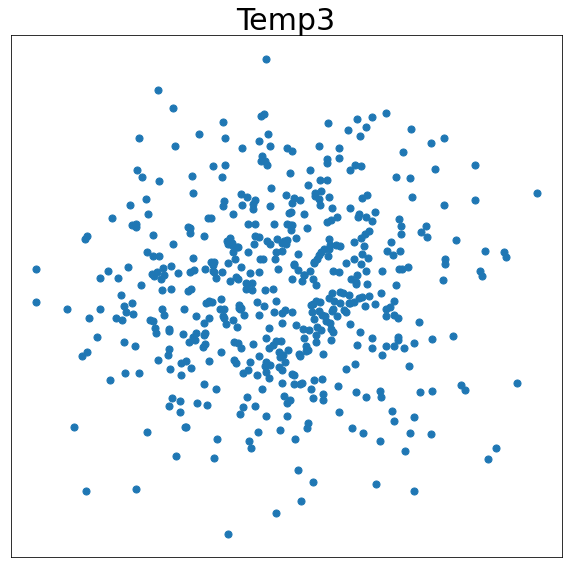

In [12]:
    # Plot all 4 blobs (separately)
    for blob in range(blob_num):
        temp = X[np.where(y==blob)]
        #Assign class 0 or 1 to each Gaussian blob 
        colors = sns.color_palette("Dark2", n_colors=2)
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.scatter(temp[:, 0], temp[:, 1], s=50)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Temp{}".format(blob), fontsize=30)
        plt.tight_layout()
        print("Blob Number: ", blob)
        print("Centre/Mean:", np.mean(temp, axis = 0))
        print("Standard Dev: ", np.std(temp, axis = 0))


In [13]:
#Contents of 'y', blob number moves from 0 to 3
y

array([1, 3, 3, ..., 2, 2, 2])

In [14]:
    #Should be skipped because angle_params = 1
    if angle_params != None:
        R = _generate_2d_rotation(angle_params)
        X = X @ R

In [15]:
#TODO: Move get_colors to 'functions'
def get_colors(colors, inds):
    c = [colors[i] for i in inds]
    print(c[0])
    print(inds[0])
    return c

(0.8509803921568627, 0.37254901960784315, 0.00784313725490196)
1


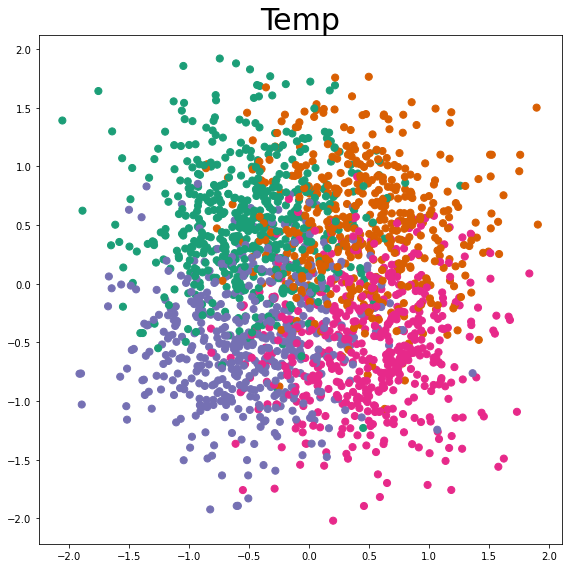

In [16]:
    #Plots all blobs on one graph with different colors
    #As visible, all gaussians are present in all quadrants 
    colors = sns.color_palette("Dark2", n_colors=4)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], c=get_colors(colors, y), s=50)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_title("Temp", fontsize=30)
    plt.tight_layout()

In [17]:
    #Assign Classes to blobs
    #for blob in range(blob_num):
    #    y[np.where(y == blob)] = class_label[blob]

In [18]:
#y

In [19]:
    #See which color belongs to which class
    #colors = sns.color_palette("Dark2", n_colors=2)
    #fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    #ax.scatter(X[:, 0], X[:, 1], c=get_colors(colors, y), s=50)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_title("Temp", fontsize=30)
    #labels = ['0', '1'] 
    #plt.legend(labels)
    #plt.tight_layout()

In [20]:
np.full(len(centers), cluster_std)

array([0.5, 0.5, 0.5, 0.5])

In [21]:
#Considering X1 & X2 to be independent, both variables can be analyzed as univariate Gaussians separately
#After that, the probability = equal to product of individual probabilities 
G0 = X[np.where(y==0)]
G1 = X[np.where(y==1)]
G2 = X[np.where(y==2)]
G3 = X[np.where(y==3)]

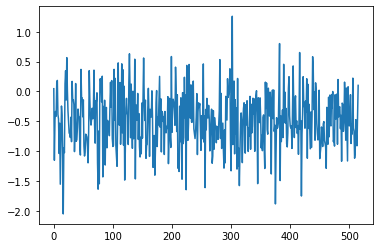

In [22]:
plt.plot(G0[:,0])

In [23]:
np.mean(G0[:,0])

-0.4865672652130719

In [24]:
np.std(G0[:,0])

0.47500470312102505

In [25]:
G0[0,0]

0.04642451990914742

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

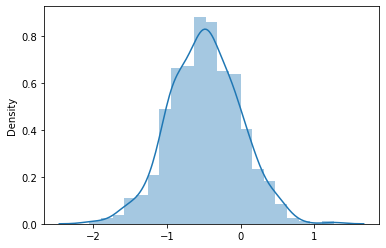

In [26]:
#Plot distribution of Gaussion 0
sns.distplot(G0[:,0])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

[]

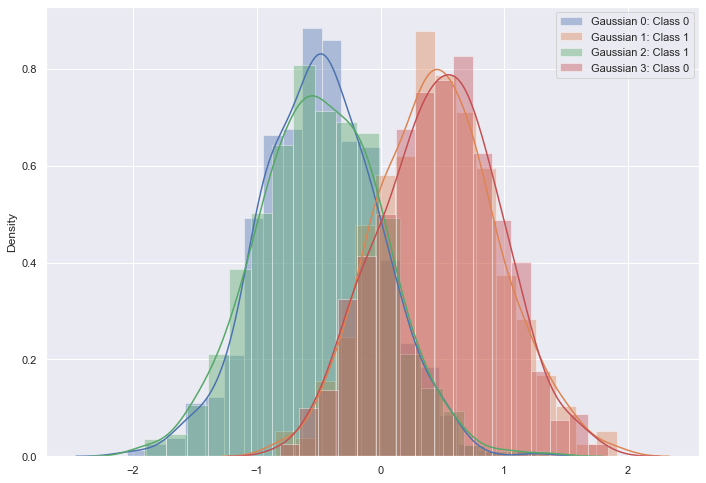

In [27]:
#Plot distribution of all Gaussians along X axis
#As visible, (G0 & G2) & (G1 & G3) are identically distributed - this is because the plot is along X axis
# Along Y-axis, the pairs would change (G0 & G1) & (G2 & G3) are identically distributed
sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.scatter(0, 0.4839, marker='o', s=100)
sns.distplot(G0[:,0], label = "Gaussian 0: Class 0")
sns.distplot(G1[:,0], label = "Gaussian 1: Class 1")
sns.distplot(G2[:,0], label = "Gaussian 2: Class 1")
sns.distplot(G3[:,0], label = "Gaussian 3: Class 0")
plt.legend()
plt.plot()

In [28]:
#Consider Intersection of all Gaussians with Gaussian 0
#Gaussian 0 & Gaussian 1 vary along feature x1
#Gaussian 0 & Gaussian 2 vary along feature x2
#Gaussian 0 & Gaussian 3 belong to the same class - therefore their variation does not induce any error 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

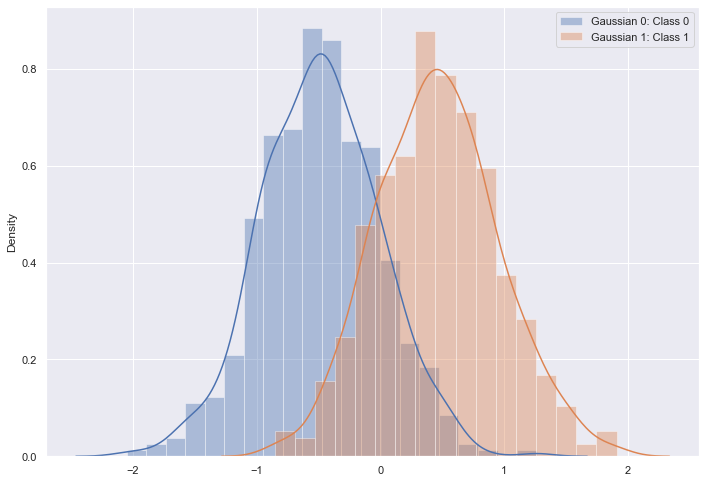

In [29]:
#Plotting variation between G0 & G1
#The intersection taken analytically is from the Gaussians of the original mean (centre) & std dev (assigned to blob)
# Error : Area under G1 from -1 to 0 + Area under G0 from  to 1
# Calculated using online calculators = 0.394
sns.distplot(G0[:,0], label = "Gaussian 0: Class 0")
sns.distplot(G1[:,0], label = "Gaussian 1: Class 1")
#plt.scatter(0, 0.4839, marker='o', s=100)
plt.legend()
plt.plot()

In [30]:
print("\t\t   Mean \t\t\tStd Dev\n")
print("Gaussian 0: ", np.mean(G0[:,0]), "\t", np.std(G0[:,0]),"\n")
print("Gaussian 1: ", np.mean(G1[:,0]), "\t", np.std(G1[:,0]),"\n")


		   Mean 			Std Dev

Gaussian 0:  -0.4865672652130719 	 0.47500470312102505 

Gaussian 1:  0.4599765670353628 	 0.4884764919727978 



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

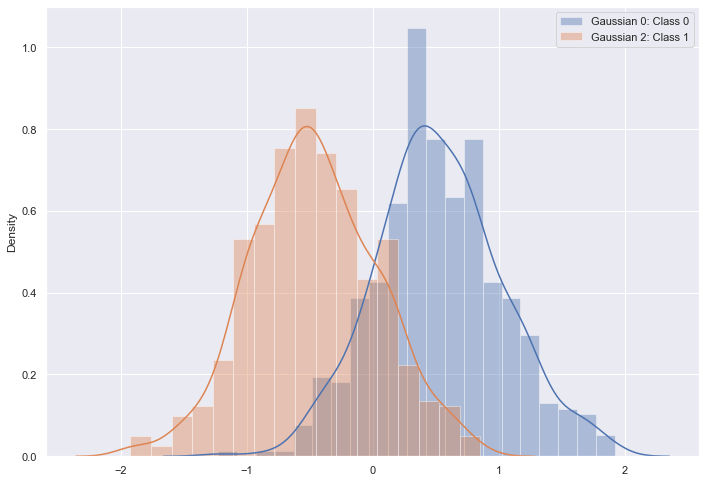

In [31]:
#Plotting variation between G0 & G2
#The intersection taken analytically is from the Gaussians of the original mean (centre) & std dev (assigned to blob)
# Error : Area under G0 from -1 to 0 + Area under G2 from  to 1
# Calculated using online calculators = 0.394
sns.distplot(G0[:,1], label = "Gaussian 0: Class 0")
sns.distplot(G2[:,1], label = "Gaussian 2: Class 1")
#plt.scatter(-0.025, 0.52, marker='o', s=100)
plt.legend()
plt.plot()

In [32]:
print("\t\t   Mean \t\t\tStd Dev\n")
print("Gaussian 0: ", np.mean(G0[:,1]), "\t", np.std(G0[:,1]),"\n")
print("Gaussian 2: ", np.mean(G2[:,1]), "\t", np.std(G2[:,1]),"\n")
#Estimated using these values, and then adjusted 

		   Mean 			Std Dev

Gaussian 0:  0.5263901576061979 	 0.5020508894603395 

Gaussian 2:  -0.46654232207648055 	 0.4980618199459155 



In [33]:
#Both the distributions are independent : Multiply probabilities
# 0.394 * 0.394 = 0.155
#Similar variation for G3 with G1 & G2 respectively
            #UNSURE! Technically, once G1 & G2 are not treated as separate identities (because same class)
            #        then the total error will be error of EITHER G0 OR G3 with G1 & G2? 
            #        IF YES, KDF & KDN do not reach Bayes' error even after 20000 samples & 20 reps 
# Multiply probability by 2
#Total probability = 2 * 0.155 = 0.310 

In [34]:
#TODO: Estimate Bayes' error using RF & verify if it matches the analytical estimate

In [35]:
import pandas as pd
p = 20
p_star = 3
#sample_size = np.logspace(
#        np.log10(10),
#        np.log10(20000),
#        num=12,
#        endpoint=True,
#        dtype=int
#        )
sample = 20000 #[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]#[1000,5000,10000]
n_test = 1000
reps = 20

cov_type = 'full' #{'diag', 'full', 'spherical'}
criterion = None

n_estimators = 500
df = pd.DataFrame()

In [36]:
        X, y = generate_gaussian_parity(sample, cluster_std=0.5)
        X_test, y_test = generate_gaussian_parity(1000, cluster_std=0.5)

In [37]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [38]:
accuracy_kdf = []
accuracy_kdf_ = []
accuracy_rf = []
accuracy_rf_ = []

In [39]:
sample_size = np.logspace(
        np.log10(10),
        np.log10(20000),
        num=12,
        endpoint=True,
        dtype=int
        )

In [40]:
        
    from kdg import kdf 
    for sample in sample_size: 
        print('Doing sample %d'%sample)
        for ii in range(reps):
            '''
            Earlier implementation of gaussian parity for KDF 
            X, y = gaussian_sparse_parity(
                sample,
                p_star=p_star,
                p=p
            )
            X_test, y_test = gaussian_sparse_parity(
                n_test,
                p_star=p_star,
                p=p
            )''' 

            X, y = generate_gaussian_parity(sample, cluster_std=0.5)
            X_test, y_test = generate_gaussian_parity(1000, cluster_std=0.5)

            #train kdf
            model_kdf = kdf(
                    kwargs={'n_estimators':n_estimators}
                )

            model_kdf.fit(X, y)
            accuracy_kdf.append(
                    np.mean(
                        model_kdf.predict(X_test) == y_test
                    )
                )
            accuracy_rf.append(
                    np.mean(
                        model_kdf.rf_model.predict(X_test) == y_test
                    )
                )
            print(np.mean(
                    model_kdf.rf_model.predict(X_test) == y_test
                ))

Doing sample 10
0.46
0.591
0.565
0.589
0.582
0.601
0.549
0.595
0.495
0.609
0.589
0.527
0.536
0.569
0.486
0.561
0.494
0.555
0.545
0.598
Doing sample 19
0.544
0.599
0.622
0.539
0.604
0.593
0.609
0.592
0.6
0.528
0.578
0.563
0.579
0.545
0.526
0.537
0.617
0.616
0.587
0.556
Doing sample 39
0.586
0.594
0.639
0.618
0.681
0.605
0.62
0.559
0.687
0.672
0.674
0.551
0.614
0.555
0.667
0.59
0.608
0.57
0.648
0.518
Doing sample 79
0.629
0.655
0.661
0.65
0.653
0.646
0.619
0.667
0.663
0.659
0.666
0.646
0.639
0.681
0.666
0.611
0.683
0.652
0.684
0.634
Doing sample 158
0.687
0.642
0.687
0.68
0.645
0.647
0.689
0.635
0.643
0.682
0.677
0.689
0.686
0.706
0.67
0.721
0.726
0.637
0.658
0.71
Doing sample 316
0.7
0.674
0.675
0.699
0.695
0.737
0.688
0.669
0.694
0.702
0.678
0.696
0.686
0.689
0.693
0.665
0.698
0.663
0.682
0.688
Doing sample 631
0.702
0.673
0.71
0.691
0.708
0.72
0.726
0.673
0.721
0.674
0.682
0.688
0.686
0.7
0.705
0.673
0.67
0.706
0.692
0.683
Doing sample 1260
0.711
0.692
0.724
0.688
0.679
0.696
0.709
0.

In [41]:
print(1-np.mean(
                model_kdf.rf_model.predict(X_test) == y_test
            ))

0.30900000000000005


In [42]:
#Analytical Estimate = 0.31
#RF Estimate (With 20000 samples & 20 reps) = 0.3

In [43]:
len(accuracy_rf)

240

In [53]:
sample_list = []
for sample in sample_size: 
    for i in range(0,20):
        sample_list.append(sample)
#sample_list.append(20000)

In [54]:
df['accuracy_rf'] = accuracy_rf


err_rf_med = []
err_rf_25_quantile = []
err_rf_75_quantile = []

err_rf_med_ = []
err_rf_25_quantile_ = []
err_rf_75_quantile_ = []

In [55]:
len(sample_list)

240

In [56]:
df['sample'] = sample_list

In [57]:
for sample in sample_size:
    err_rf = 1 - df['accuracy_rf'][df['sample']==sample]
    #err_rf_ = 1 - df['feature selected rf'][df['sample']==sample]
    #err_kdf = 1 - df['accuracy kdf'][df['sample']==sample]
    #err_kdf_ = 1 - df['feature selected kdf'][df['sample']==sample]

    err_rf_med.append(np.median(err_rf))
    err_rf_25_quantile.append(
            np.quantile(err_rf,[.25])[0]
        )
    err_rf_75_quantile.append(
        np.quantile(err_rf,[.75])[0]
    )

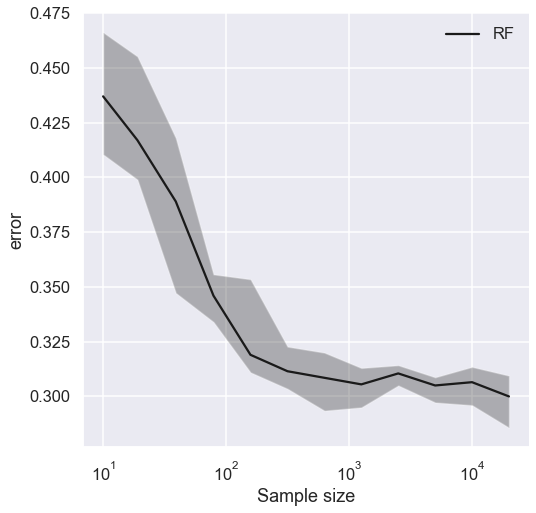

In [73]:
import matplotlib.pyplot as plt
sns.set_context('talk')
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(sample_size, err_rf_med, c="k", label='RF')
ax.fill_between(sample_size, err_rf_25_quantile, err_rf_75_quantile, facecolor='k', alpha=.3)

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_xscale('log')
ax.set_xlabel('Sample size')
ax.set_ylabel('error')
ax.legend(frameon=False)

plt.savefig('RF_BayesError.pdf')